# 1. Introduction

## Lead Scoring

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

# 2. Preprocessing 

#### 2.1 Import packages

In [645]:
# Importing required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [646]:
# Read data
df = pd.read_csv('/content/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [647]:
# Shape of DataFrame
df.shape

(9240, 37)

In [648]:
# Let's check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [649]:
# Let's statistical summary of the DataFrame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### 2.2 Handling Missing Values

In [650]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.head(3))
# Getting columns with high null values percentage
df_high_null = df_null[df_null['% Null']>25].sort_values(by='% Null')
# Columns in the above set will be dropped
cols_to_drop = df_high_null.Column.values
cols_to_drop = cols_to_drop[2:]
# Getting columns with low null values percentage
df_low_null = df_null[df_null['% Null']<25].sort_values(by='% Null')

        Column  % Null
0  Prospect ID     0.0
1  Lead Number     0.0
2  Lead Origin     0.0


In [651]:
# Dropping Columns with high null values
df.drop(labels=list(cols_to_drop),inplace=True,axis=1)
# Dropping Rows where null values were less 
df.dropna(inplace=True,axis=0)
# Checking results
df.isna().sum()
print("Shape after handling missing values",df.shape)

Shape after handling missing values (4925, 29)


### 2.3 Data Validation

In [652]:
# Creating a list of Object data type columns
obj_cols = df.select_dtypes(np.object).columns.tolist()

In [653]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(obj_cols)

-----------------------------
956919ef-7c35-48be-9dab-524546a97a06    0.02
2e2d5cdc-3df8-4256-848f-f9614c99557b    0.02
d9fabab9-f42b-4a75-aab5-ce07fce367cd    0.02
5f49e2cf-1f8d-4485-8d03-81fe26510b42    0.02
6ecb98a0-9a5f-422d-bb4d-b5d33c34b9f6    0.02
                                        ... 
e4dd87f1-4643-4ec0-9a2a-8ace56740a0a    0.02
d5312a24-2330-4d26-aa99-41816f77b03a    0.02
e8c2aee4-27bc-4a89-b8ab-bff7eb13ce7a    0.02
15594d8b-eee1-4d03-a6bc-05454972c1b6    0.02
e567ad74-1dd0-4d85-aba3-bc8e36a8affb    0.02
Name: Prospect ID, Length: 4925, dtype: float64
-----------------------------
-----------------------------
Landing Page Submission    73.06
API                        26.40
Lead Add Form               0.55
Name: Lead Origin, dtype: float64
-----------------------------
-----------------------------
Google               41.18
Direct Traffic       37.69
Organic Search       17.46
Olark Chat            1.48
Referral Sites        1.44
Reference             0.43
Welingak Web

In [654]:
def drop_cols(col_list):
  df.drop(labels=col_list,inplace=True,axis=1)
  print("Shape after dropping columns:",df.shape)

In [655]:
# Dropping columns which have highly imbalanced values in the dataset
cols_to_drop_2 = ['Do Not Call','Search','Magazine','Digital Advertisement','Newspaper Article','X Education Forums','Newspaper','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
drop_cols(cols_to_drop_2)

Shape after dropping columns: (4925, 17)


In [656]:
# Dropping columns which do not add value to the dataset
cols_to_drop_3 = ['Prospect ID','How did you hear about X Education','Country','City','Do Not Email']
drop_cols(cols_to_drop_3)

Shape after dropping columns: (4925, 12)


In [657]:
# Specialization columns has value as 'Select', we can consider this error as 'Other' category
df['Specialization'] = df['Specialization'].apply(lambda x:'Other' if x=='Select' else x)

In [658]:
df['Specialization'].value_counts()

Other                                906
Finance Management                   657
Human Resource Management            576
Marketing Management                 553
Operations Management                349
Business Administration              277
IT Projects Management               258
Supply Chain Management              251
Banking, Investment And Insurance    230
Media and Advertising                152
Travel and Tourism                   145
International Business               128
Healthcare Management                101
Hospitality Management                78
Retail Management                     74
E-COMMERCE                            74
Rural and Agribusiness                52
E-Business                            41
Services Excellence                   23
Name: Specialization, dtype: int64

In [659]:
df.drop(labels='Lead Number',inplace=True,axis=1)

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4925 non-null   object 
 1   Lead Source                             4925 non-null   object 
 2   Converted                               4925 non-null   int64  
 3   TotalVisits                             4925 non-null   float64
 4   Total Time Spent on Website             4925 non-null   int64  
 5   Page Views Per Visit                    4925 non-null   float64
 6   Last Activity                           4925 non-null   object 
 7   Specialization                          4925 non-null   object 
 8   What is your current occupation         4925 non-null   object 
 9   A free copy of Mastering The Interview  4925 non-null   object 
 10  Last Notable Activity                   4925 non-null   obje

### 2.4 Encoding and Dummy Variables

In [661]:
df['A free copy of Mastering The Interview'].value_counts()

No     2770
Yes    2155
Name: A free copy of Mastering The Interview, dtype: int64

In [662]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)

In [663]:
# Creating a list of object columns
obj_cols = df.select_dtypes(np.object).columns.tolist()
obj_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Last Notable Activity']

In [664]:
# Subsetting object columns dataset
df_obj = df[obj_cols]
# Creating dummy variables
df_obj = pd.get_dummies(df_obj, drop_first=True)
print(df_obj.head())

   Lead Origin_Landing Page Submission  ...  Last Notable Activity_View in browser link Clicked
1                                    0  ...                                                  0 
2                                    1  ...                                                  0 
3                                    1  ...                                                  0 
4                                    1  ...                                                  0 
6                                    1  ...                                                  0 

[5 rows x 67 columns]


In [665]:
# Merging datasets
df_final = pd.concat([df,df_obj], axis=1)
df_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [666]:
# Dropping original features
df_final.drop(labels=['Specialization_Other']+obj_cols,inplace=True,axis=1)

In [667]:
print("Shape of the DataFrame after creating dummy variables:",df_final.shape)

Shape of the DataFrame after creating dummy variables: (4925, 71)


### 2.5 Correlation Matrix

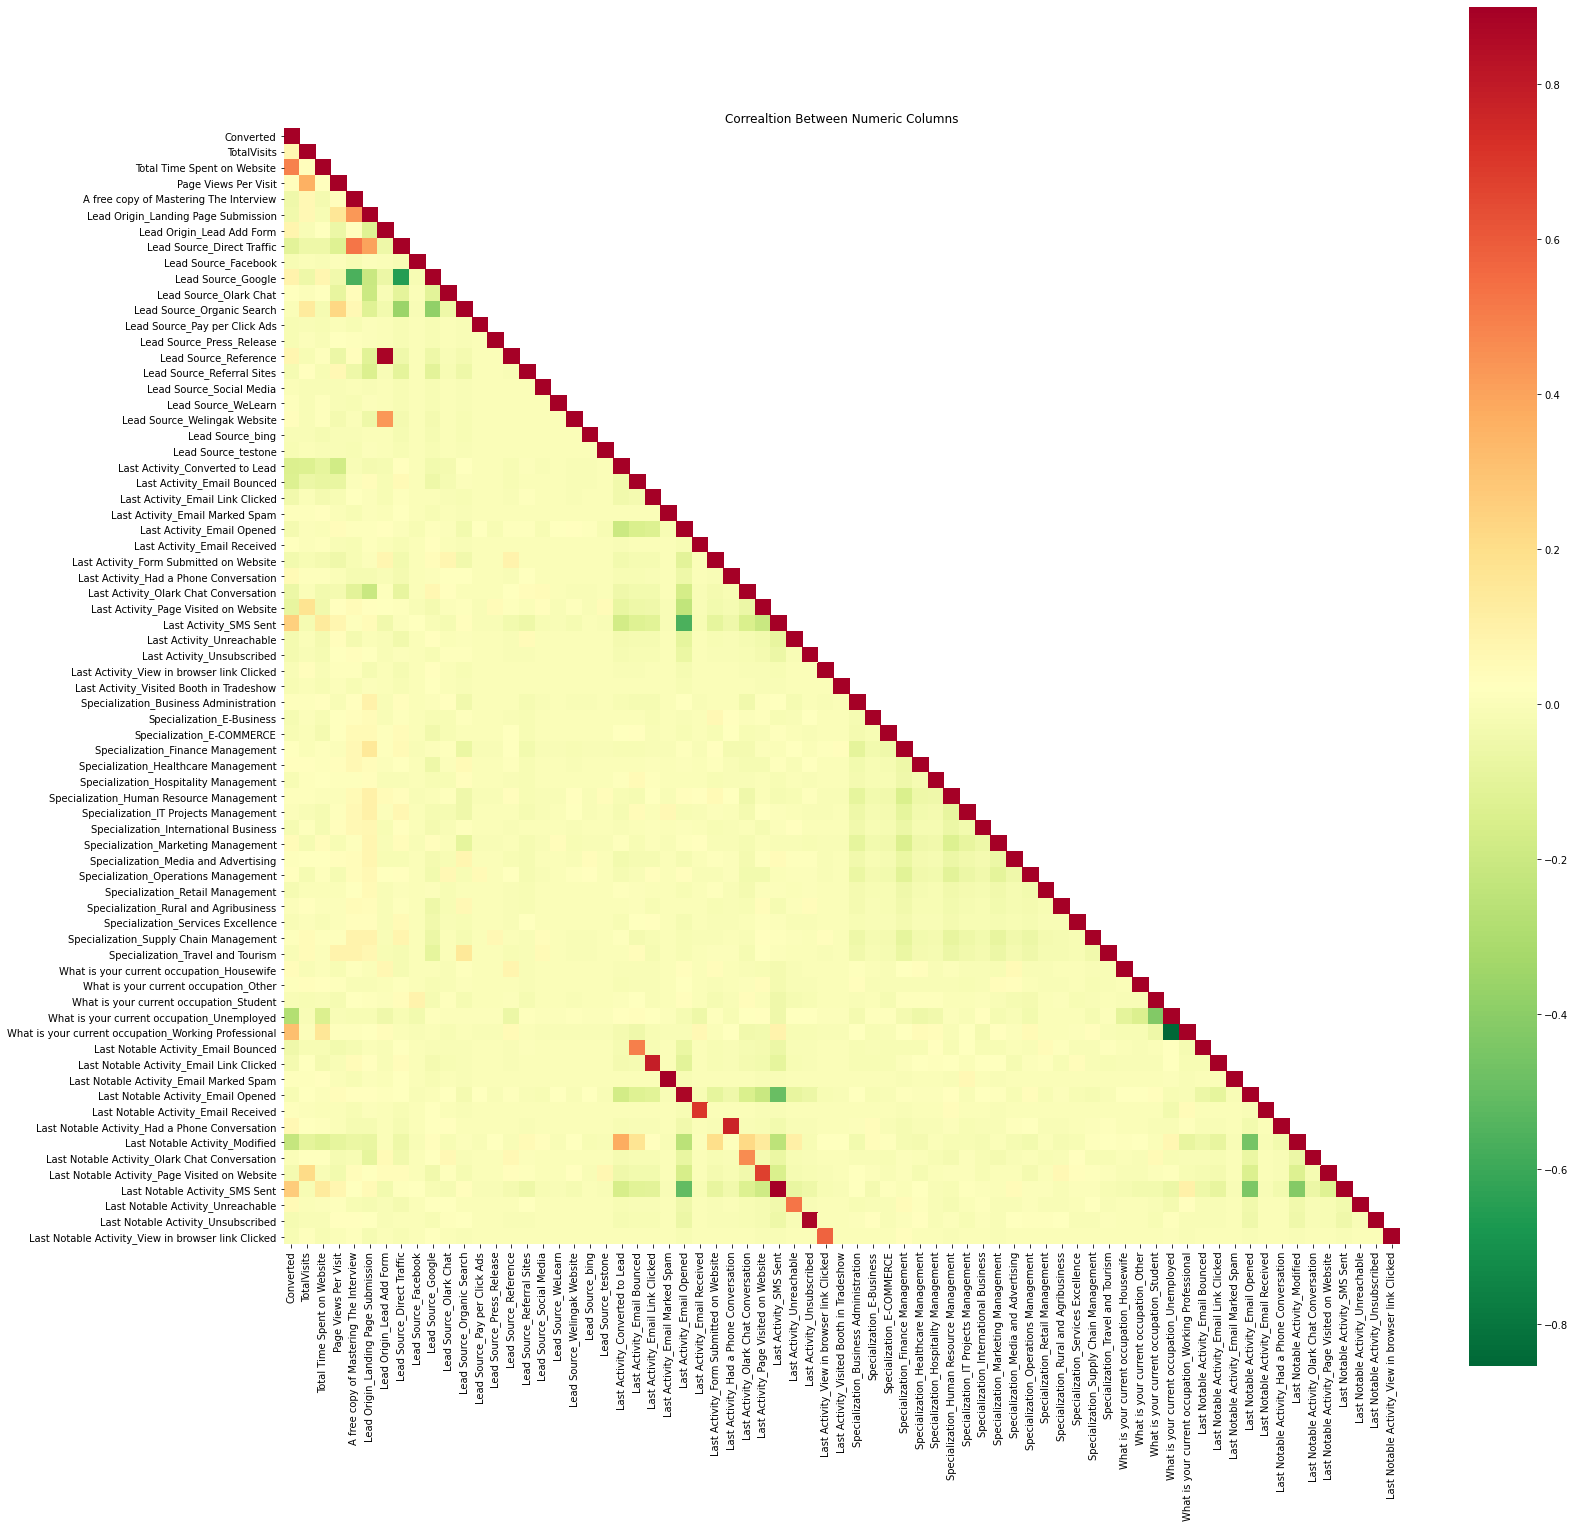

In [668]:
#Firstly, creating the correlation matrix
corr_mat = df_final.corr()
corr_mat_mask = np.array(corr_mat)
#Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[25,25])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.9, square=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

### 2.6 Train-Test Split

In [669]:
# Import required methods
from sklearn.model_selection import train_test_split

# Creating a list of numeric features
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Creating Features and Dependent variable sets
X = df_final.drop(labels='Converted',axis=1)
y = df_final['Converted']

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3, random_state=21) 

### 2.7 Feature Scaling

In [670]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# 3. Model building

In [671]:
# Importing Logistic Regressor model
from sklearn.linear_model import LogisticRegression

In [672]:
#Importing the package for statistical modelling
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Creating a function to create a statsmodel
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.GLM(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
#creating a function to check the VIF values    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    #vif['VIF'] = round(vif['VIF'], 5)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [673]:
#Importing the RFE: Recursive Feature Elimination
from sklearn.feature_selection import RFE

### 3.1 Model 1

In [674]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Checking RFE for the model
rfe = RFE(logmodel, 25)
rfe = rfe.fit(X_train, y_train)
ref_df = pd.DataFrame(data={'Column':X_train.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
52,What is your current occupation_Housewife,True,1
67,Last Notable Activity_Unreachable,True,1
54,What is your current occupation_Student,True,1
55,What is your current occupation_Unemployed,True,1
56,What is your current occupation_Working Profes...,True,1
64,Last Notable Activity_Olark Chat Conversation,True,1
63,Last Notable Activity_Modified,True,1
68,Last Notable Activity_Unsubscribed,True,1
60,Last Notable Activity_Email Opened,True,1
62,Last Notable Activity_Had a Phone Conversation,True,1


In [675]:
X_train_new = build_model(X_train, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3383
Model Family:                Gaussian   Df Model:                           63
Link Function:               identity   Scale:                         0.15130
Method:                          IRLS   Log-Likelihood:                -1604.0
Date:                Mon, 06 Sep 2021   Deviance:                       511.85
Time:                        17:36:42   Pearson chi2:                     512.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [676]:
checkVIF(X_train_new)

,Features,VIF
9,Lead Source_Google,inf
60,Last Notable Activity_Email Marked Spam,inf
17,Lead Source_WeLearn,inf
16,Lead Source_Social Media,inf
15,Lead Source_Referral Sites,inf
...,...,...
8,Lead Source_Facebook,NaN
12,Lead Source_Pay per Click Ads,NaN
19,Lead Source_bing,NaN
20,Lead Source_testone,NaN


# Model 2

In [677]:
X_train_2 = X_train.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)
X_test_2 = X_test.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)

X_train_new = build_model(X_train_2, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3387
Model Family:                Gaussian   Df Model:                           59
Link Function:               identity   Scale:                         0.15127
Method:                          IRLS   Log-Likelihood:                -1605.7
Date:                Mon, 06 Sep 2021   Deviance:                       512.36
Time:                        17:36:44   Pearson chi2:                     512.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [678]:
checkVIF(X_train_new)

,Features,VIF
0,const,2644.980599
55,Last Notable Activity_Email Opened,775.716793
58,Last Notable Activity_Modified,737.129444
61,Last Notable Activity_SMS Sent,705.122043
20,Last Activity_Email Opened,420.265424
...,...,...
8,Lead Source_Facebook,NaN
11,Lead Source_Pay per Click Ads,NaN
15,Lead Source_bing,NaN
16,Lead Source_testone,NaN


In [679]:
#Checking RFE for the model
rfe = RFE(logmodel, 25)
rfe = rfe.fit(X_train_2, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_2.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
44,Specialization_Services Excellence,True,1
47,What is your current occupation_Housewife,True,1
61,Last Notable Activity_Unreachable,True,1
49,What is your current occupation_Student,True,1
50,What is your current occupation_Unemployed,True,1
51,What is your current occupation_Working Profes...,True,1
58,Last Notable Activity_Olark Chat Conversation,True,1
62,Last Notable Activity_Unsubscribed,True,1
57,Last Notable Activity_Modified,True,1
56,Last Notable Activity_Had a Phone Conversation,True,1


# Model 3

In [680]:
Col_list = ref_df[ref_df['Rank']==1].Column.tolist()

In [681]:
X_train_3 = X_train[Col_list]
#X_test_2 = X_test.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)

X_train_new = build_model(X_train_3, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3421
Model Family:                Gaussian   Df Model:                           25
Link Function:               identity   Scale:                         0.15235
Method:                          IRLS   Log-Likelihood:                -1635.1
Date:                Mon, 06 Sep 2021   Deviance:                       521.18
Time:                        17:36:49   Pearson chi2:                     521.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [682]:
checkVIF(X_train_new)

,Features,VIF
0,const,220.302721
19,What is your current occupation_Unemployed,24.927293
20,What is your current occupation_Working Profes...,20.218171
18,What is your current occupation_Student,6.583643
4,Lead Source_Reference,4.759839
2,Lead Origin_Lead Add Form,4.753980
7,Last Activity_Had a Phone Conversation,3.530720
21,Last Notable Activity_Had a Phone Conversation,3.526293
17,What is your current occupation_Housewife,1.329363
22,Last Notable Activity_Modified,1.283827


In [683]:
#Checking RFE for the model
rfe = RFE(logmodel, 20)
rfe = rfe.fit(X_train_3, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_3.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
5,Last Activity_Email Bounced,True,1
22,Last Notable Activity_Olark Chat Conversation,True,1
21,Last Notable Activity_Modified,True,1
20,Last Notable Activity_Had a Phone Conversation,True,1
19,What is your current occupation_Working Profes...,True,1
18,What is your current occupation_Unemployed,True,1
17,What is your current occupation_Student,True,1
16,What is your current occupation_Housewife,True,1
15,Specialization_Services Excellence,True,1
24,Last Notable Activity_Unsubscribed,True,1


# Model 4 

In [684]:
X_train_4 = X_train_3.drop(labels=['What is your current occupation_Unemployed','What is your current occupation_Working Professional'],axis=1)
#X_test_2 = X_test.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)

X_train_new = build_model(X_train_4, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3423
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                         0.16487
Method:                          IRLS   Log-Likelihood:                -1772.2
Date:                Mon, 06 Sep 2021   Deviance:                       564.34
Time:                        17:36:50   Pearson chi2:                     564.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [685]:
checkVIF(X_train_new)

,Features,VIF
4,Lead Source_Reference,4.753040
2,Lead Origin_Lead Add Form,4.752906
0,const,3.761258
7,Last Activity_Had a Phone Conversation,3.530446
19,Last Notable Activity_Had a Phone Conversation,3.525697
20,Last Notable Activity_Modified,1.281682
5,Last Activity_Converted to Lead,1.182972
8,Last Activity_SMS Sent,1.125102
11,Specialization_Human Resource Management,1.073262
13,Specialization_Marketing Management,1.065063


In [686]:
#Checking RFE for the model
rfe = RFE(logmodel, 20)
rfe = rfe.fit(X_train_4, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_4.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
3,Lead Source_Reference,True,1
20,Last Notable Activity_Olark Chat Conversation,True,1
19,Last Notable Activity_Modified,True,1
18,Last Notable Activity_Had a Phone Conversation,True,1
16,What is your current occupation_Housewife,True,1
15,Specialization_Services Excellence,True,1
14,Specialization_Rural and Agribusiness,True,1
13,Specialization_Operations Management,True,1
21,Last Notable Activity_Unreachable,True,1
12,Specialization_Marketing Management,True,1


# Model 5

In [687]:
X_train_5 = X_train_4.drop(labels=['Lead Origin_Lead Add Form','Lead Source_Reference'],axis=1)
#X_test_2 = X_test.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)

X_train_new = build_model(X_train_5, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3425
Model Family:                Gaussian   Df Model:                           21
Link Function:               identity   Scale:                         0.16616
Method:                          IRLS   Log-Likelihood:                -1786.7
Date:                Mon, 06 Sep 2021   Deviance:                       569.10
Time:                        17:36:50   Pearson chi2:                     569.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [688]:
#Checking RFE for the model
rfe = RFE(logmodel, 15)
rfe = rfe.fit(X_train_5, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_5.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
1,Lead Source_Direct Traffic,True,1
18,Last Notable Activity_Olark Chat Conversation,True,1
17,Last Notable Activity_Modified,True,1
16,Last Notable Activity_Had a Phone Conversation,True,1
14,What is your current occupation_Housewife,True,1
13,Specialization_Services Excellence,True,1
19,Last Notable Activity_Unreachable,True,1
10,Specialization_Marketing Management,True,1
7,Specialization_Healthcare Management,True,1
5,Last Activity_SMS Sent,True,1


In [689]:
X_train_6 = X_train_5.drop(labels=['What is your current occupation_Student','Specialization_Rural and Agribusiness'],axis=1)
#X_test_2 = X_test.drop(labels=['Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Last Activity_Email Marked Spam','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Referral Sites'],axis=1)

X_train_new = build_model(X_train_6, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3427
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.16614
Method:                          IRLS   Log-Likelihood:                -1787.5
Date:                Mon, 06 Sep 2021   Deviance:                       569.37
Time:                        17:36:51   Pearson chi2:                     569.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [690]:
#Checking RFE for the model
rfe = RFE(logmodel, 12)
rfe = rfe.fit(X_train_6, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_6.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,Total Time Spent on Website,True,1
16,Last Notable Activity_Olark Chat Conversation,True,1
15,Last Notable Activity_Modified,True,1
14,Last Notable Activity_Had a Phone Conversation,True,1
13,What is your current occupation_Housewife,True,1
17,Last Notable Activity_Unreachable,True,1
18,Last Notable Activity_Unsubscribed,True,1
5,Last Activity_SMS Sent,True,1
4,Last Activity_Had a Phone Conversation,True,1
3,Last Activity_Email Bounced,True,1


In [691]:
X_train_7 = X_train_6.drop(labels=['Specialization_IT Projects Management','Last Activity_Had a Phone Conversation','Specialization_E-COMMERCE','Specialization_Services Excellence','Last Notable Activity_Olark Chat Conversation'],axis=1)
X_test_7 = X_test[['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'What is your current occupation_Housewife',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed']]
X_train_new = build_model(X_train_7, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3432
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.16632
Method:                          IRLS   Log-Likelihood:                -1791.9
Date:                Mon, 06 Sep 2021   Deviance:                       570.82
Time:                        17:36:51   Pearson chi2:                     571.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [692]:
X_train_7.columns

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'What is your current occupation_Housewife',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [693]:
#Checking RFE for the model
rfe = RFE(logmodel, 12)
rfe = rfe.fit(X_train_7, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_7.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)
ref_df.tail(20).sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,Total Time Spent on Website,True,1
1,Lead Source_Direct Traffic,True,1
2,Last Activity_Converted to Lead,True,1
3,Last Activity_Email Bounced,True,1
4,Last Activity_SMS Sent,True,1
5,Specialization_Healthcare Management,True,1
7,Specialization_Marketing Management,True,1
9,What is your current occupation_Housewife,True,1
10,Last Notable Activity_Had a Phone Conversation,True,1
11,Last Notable Activity_Modified,True,1


In [694]:
from sklearn import metrics

In [695]:
logmodel.fit(X_train_7,y_train)

y_pred = logmodel.predict(X_test_7)

In [696]:
target_names = ['Converted', 'Not-Converted']

In [697]:
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

    Converted       0.74      0.81      0.77       795
Not-Converted       0.75      0.67      0.71       683

     accuracy                           0.74      1478
    macro avg       0.75      0.74      0.74      1478
 weighted avg       0.75      0.74      0.74      1478



In [698]:
X_train_8 = X_train_7
X_test_8 = X_test[['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'What is your current occupation_Housewife',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed']]
X_train_new = build_model(X_train_8, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3432
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.16632
Method:                          IRLS   Log-Likelihood:                -1791.9
Date:                Mon, 06 Sep 2021   Deviance:                       570.82
Time:                        17:36:52   Pearson chi2:                     571.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [699]:
logmodel.fit(X_train_8,y_train)

y_test_pred = logmodel.predict(X_test_8)
y_train_pred = logmodel.predict(X_train_8)
y_train_pred_prob = logmodel.predict_proba(X_train_8)


In [700]:
probs_df = pd.DataFrame(y_train_pred_prob,columns=['Not-Converted','Converted'])
probs_df['Converted']

0       0.874758
1       0.775684
2       0.629051
3       0.701729
4       0.173043
          ...   
3442    0.731306
3443    0.717205
3444    0.856167
3445    0.775479
3446    0.418224
Name: Converted, Length: 3447, dtype: float64

In [701]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':probs_df['Converted']})
y_train_pred_final.head()
#print(classification_report(y_test, y_pred_test, target_names=target_names))
#print(classification_report(y_train, y_pred_train, target_names=target_names))

,Converted,Converted_prob
0,1,0.874758
1,1,0.775684
2,1,0.629051
3,1,0.701729
4,0,0.173043


In [702]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,1,0.874758,1
1,1,0.775684,1
2,1,0.629051,1
3,1,0.701729,1
4,0,0.173043,0


In [703]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.7713954163040325


In [704]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [706]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

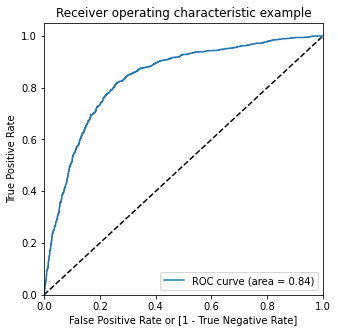

In [707]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Finding Optimal Cutoff Point

In [708]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.874758,1,1,1,1,1,1,1,1,1,1,0
1,1,0.775684,1,1,1,1,1,1,1,1,1,0,0
2,1,0.629051,1,1,1,1,1,1,1,1,0,0,0
3,1,0.701729,1,1,1,1,1,1,1,1,1,0,0
4,0,0.173043,0,1,1,0,0,0,0,0,0,0,0


In [709]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.433710  1.000000  0.000000
0.1   0.1  0.524224  0.985284  0.171107
0.2   0.2  0.670438  0.933779  0.468750
0.3   0.3  0.747897  0.875585  0.650102
0.4   0.4  0.773426  0.788629  0.761783
0.5   0.5  0.771395  0.696321  0.828893
0.6   0.6  0.752829  0.595987  0.872951
0.7   0.7  0.716275  0.457525  0.914447
0.8   0.8  0.665216  0.287625  0.954406
0.9   0.9  0.605164  0.107692  0.986168


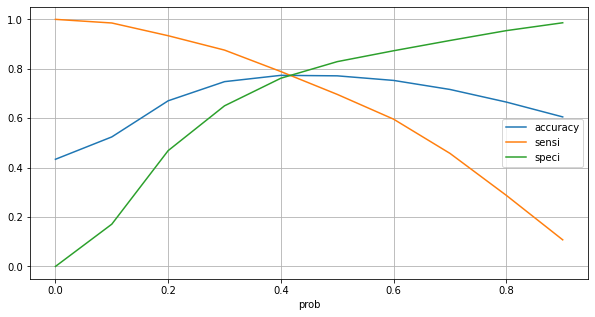

In [710]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

In [711]:
#### From the curve above, 0.41 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.874758,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.775684,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.629051,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.701729,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.173043,0,1,1,0,0,0,0,0,0,0,0,0


In [712]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.874758,1,1,1,1,1,1,1,1,1,1,0,1,87
1,1,0.775684,1,1,1,1,1,1,1,1,1,0,0,1,78
2,1,0.629051,1,1,1,1,1,1,1,1,0,0,0,1,63
3,1,0.701729,1,1,1,1,1,1,1,1,1,0,0,1,70
4,0,0.173043,0,1,1,0,0,0,0,0,0,0,0,0,17


In [713]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.7734261676820423

In [714]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1499,  453],
       [ 328, 1167]])

In [715]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [716]:
trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))
# Positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print(TN / float(TN+ FN))


0.23206967213114754
0.7203703703703703
0.8204707170224411


In [717]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1952
           1       0.72      0.78      0.75      1495

    accuracy                           0.77      3447
   macro avg       0.77      0.77      0.77      3447
weighted avg       0.78      0.77      0.77      3447

